**Import YOLOV5**


In [1]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__}")

Cloning into 'yolov5'...
remote: Enumerating objects: 15926, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15926 (delta 20), reused 25 (delta 9), pack-reused 15880
Receiving objects: 100% (15926/15926), 14.60 MiB | 20.37 MiB/s, done.
Resolving deltas: 100% (10919/10919), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data yang digunakan merupakan Custom Dataset yang sebelumnya telah dipreprocessing di RoboFlow

Berikut merupakan tahap preprocessing yang dilakukan :
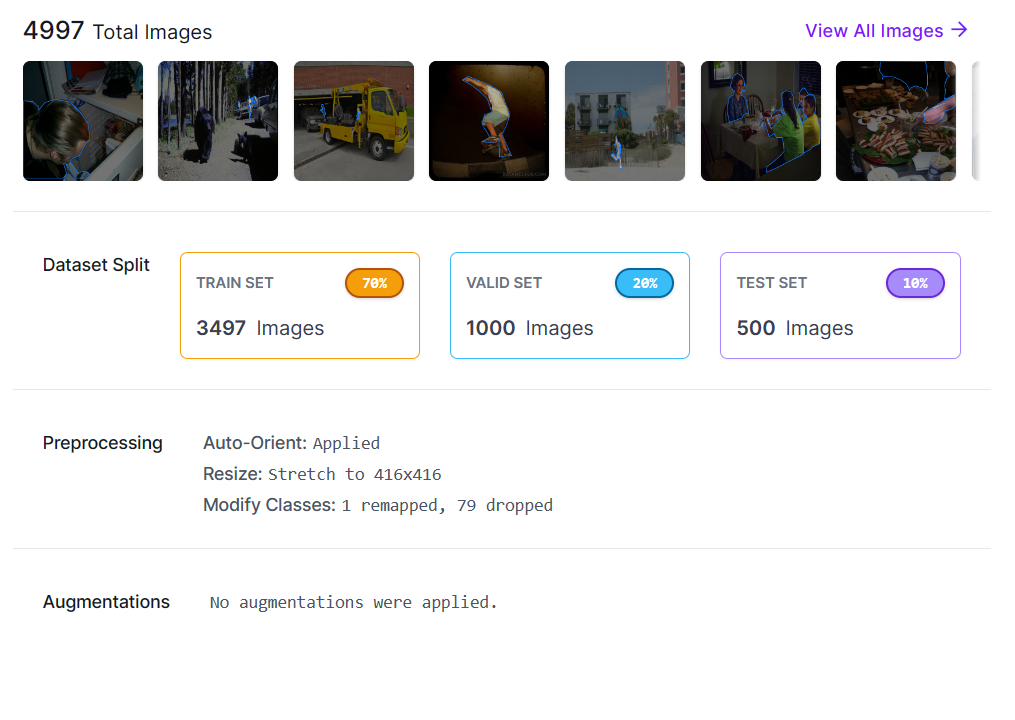

**Setelah itu import custom dataset**

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vBBzuN3S33cUSwunknVu")
project = rf.workspace("jabbarpersondetection-l08i3").project("person-detection-jabbar")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Person-Detection-Jabbar-1 in yolov5pytorch:: 100%|██████████| 9988/9988 [00:02<00:00, 3898.94it/s]


**Train Model**

- img: define input image size
- batch: determine batch size
- epochs: define the number of training epochs. (Note: often, 3000+ are common here!)
- data: Our dataset locaiton is saved in the dataset.location
- weights: specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- cache: cache images for faster training

In [5]:
!python train.py --img 416 --batch 32 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Person-Detection-Jabbar-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0

In [6]:
!zip -r /content/yolov5.zip /content/yolov5

Streaming output truncated to the last 5000 lines.
  adding: content/yolov5/Person-Detection-Jabbar-1/train/images/000000001271_jpg.rf.64b3754512a929022b9bdb70757cc236.jpg (deflated 1%)
  adding: content/yolov5/Person-Detection-Jabbar-1/train/images/000000010142_jpg.rf.06b8a8c5ea734da5e07b7bd3643f1914.jpg (deflated 0%)
  adding: content/yolov5/Person-Detection-Jabbar-1/train/images/000000024931_jpg.rf.61bc7334807561ddee728e02db263554.jpg (deflated 0%)
  adding: content/yolov5/Person-Detection-Jabbar-1/train/images/000000013959_jpg.rf.e6aa45c2ccc73feeabe4614cf6f5bd40.jpg (deflated 1%)
  adding: content/yolov5/Person-Detection-Jabbar-1/train/images/000000035358_jpg.rf.24a18da9a83e72241eac80ca6526824a.jpg (deflated 0%)
  adding: content/yolov5/Person-Detection-Jabbar-1/train/images/000000008341_jpg.rf.207b1af62d3d37a99a6baea603b86103.jpg (deflated 1%)
  adding: content/yolov5/Person-Detection-Jabbar-1/train/images/000000026367_jpg.rf.d76bc32fe71b9e94569b9c004b8cbe87.jpg (deflated 1%)
  ad

**Deteksi Gambar Baru**

In [10]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.25 --source /content/orangindonesia.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/orangindonesia.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/orangindonesia.jpg: 256x416 4 Orangs, 43.1ms
Speed: 0.3ms pre-process, 43.1ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


In [12]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.25 --source /content/orangkucing.jpeg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/orangkucing.jpeg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/orangkucing.jpeg: 256x416 2 Orangs, 42.4ms
Speed: 0.3ms pre-process, 42.4ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp3


In [13]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.25 --source /content/friends.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/friends.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/friends.jpg: 224x416 3 Orangs, 39.5ms
Speed: 0.4ms pre-process, 39.5ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp4


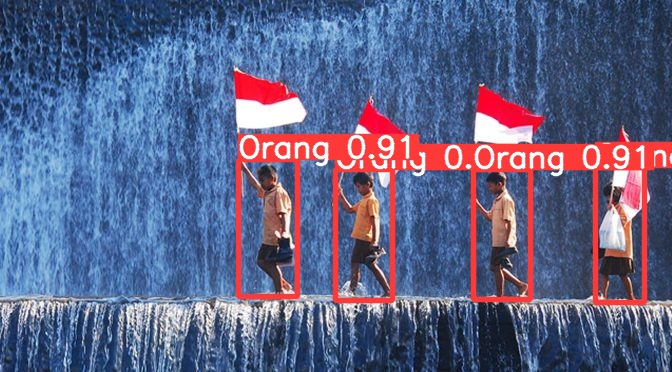

In [14]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

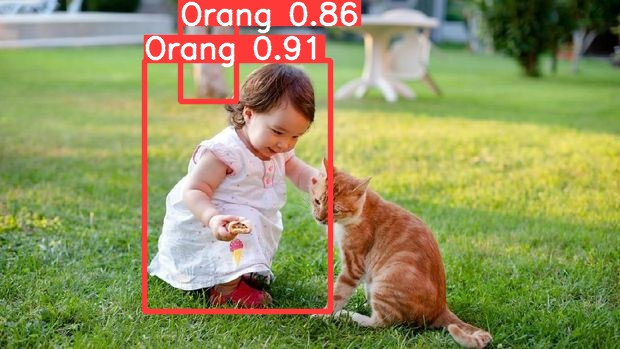

In [17]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpeg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

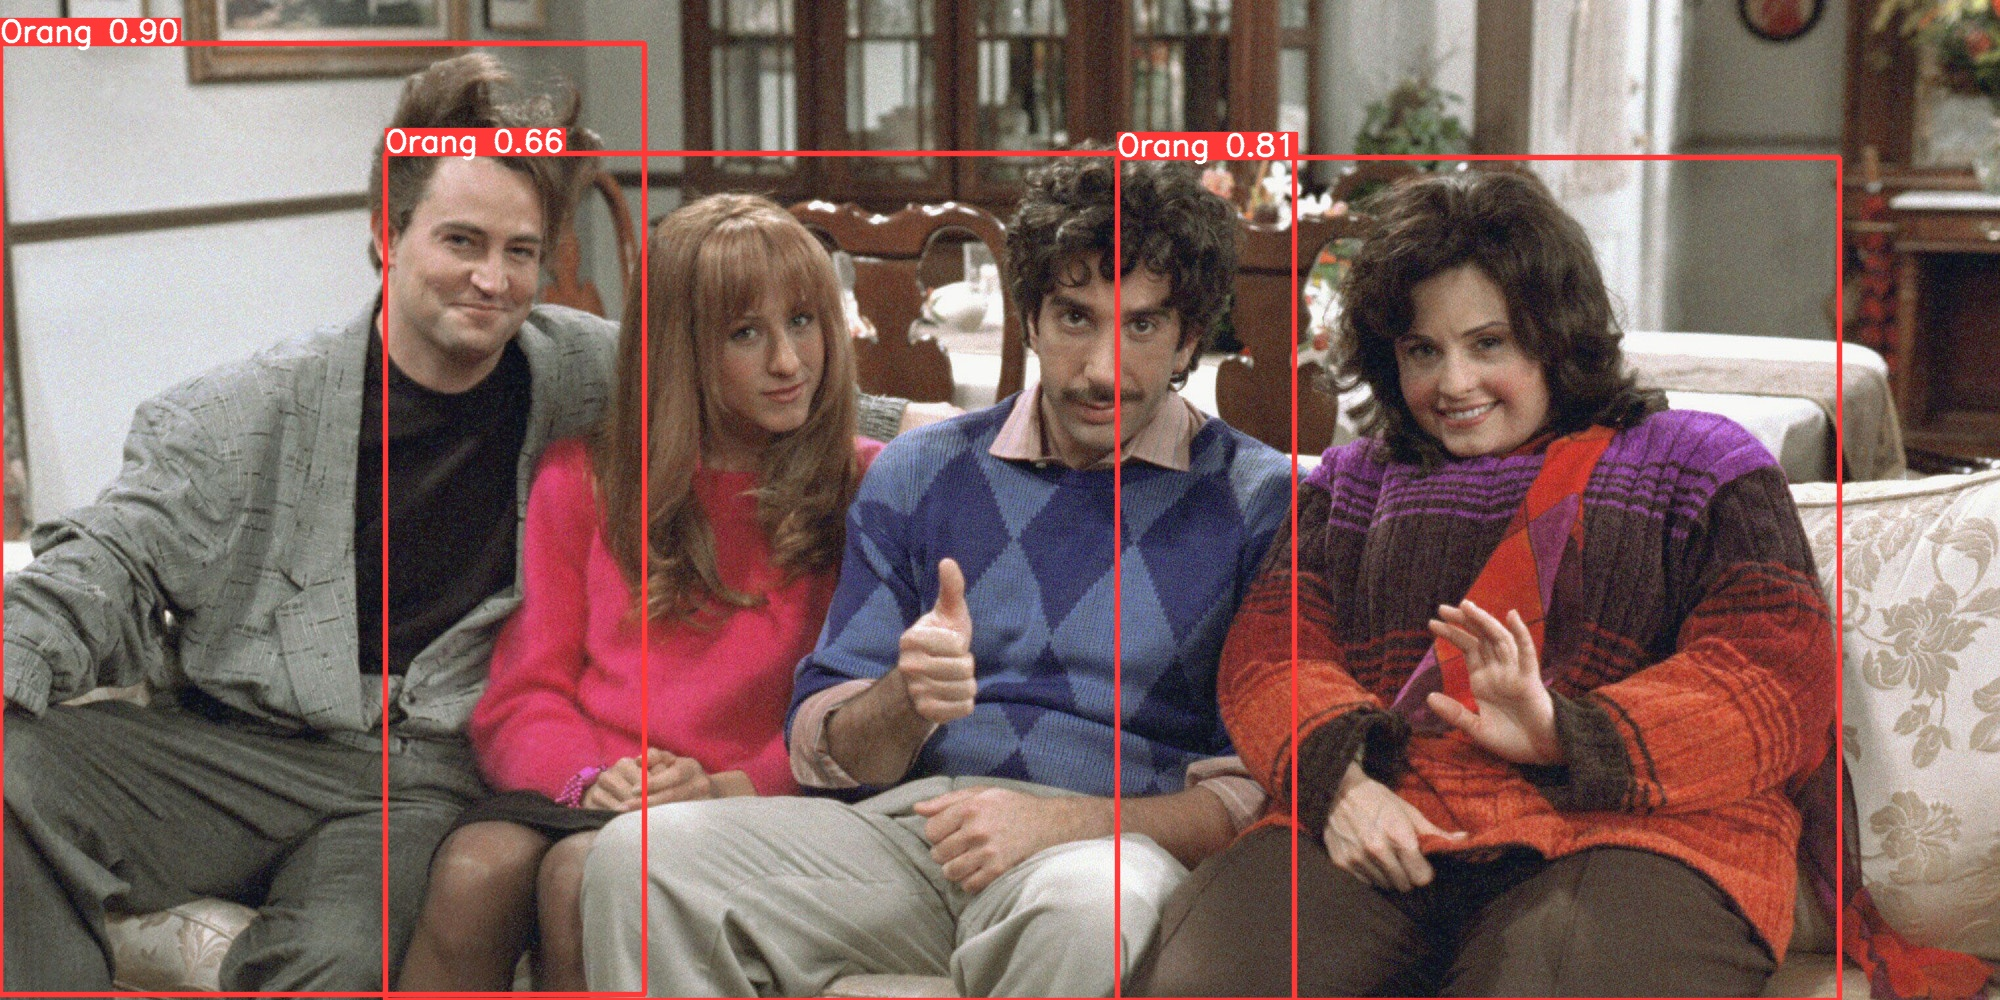

In [18]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp4/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

**Deteksi Video**

In [19]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.25 --source /content/hasildeteksivideo.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/hasildeteksivideo.mp4, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/341) /content/hasildeteksivideo.mp4: 256x416 38 Orangs, 40.2ms
video 1/1 (2/341) /content/hasildeteksivideo.mp4: 256x416 37 Orangs, 6.0ms
video 1/1 (3/341) /content/hasildeteksivideo.mp4: 256x416 36 Orangs, 5.5ms
video 1/1 (4/341) /content/hasildeteksivideo.mp4: 256x416 37 Orangs, 6.0ms
video 1/1 (5/341) /content/hasilde

**Save Model**

In [20]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>